In [ ]:
#importing the required libraries
import numpy as np
import os
import time
#importing the VGG16 model on which we wll trsin ourr data
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import resnet50
from keras.preprocessing import image
# from keras.applications.vgg16 import preprocess_input, decode_predictions
#importing the layes like input layers hidden layers and the  output layers
from keras.layers import Dense, Activation, Flatten
#from keras.layers import merge, Input
from keras.models import Model
from keras.utils import to_categorical
from sklearn.utils import shuffle
#importing thee library to split our data in training and testing data
from sklearn.model_selection import train_test_split
# from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras import layers
from keras import Model, Input
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from tensorflow.keras.applications import VGG16
from keras import layers
from keras import Model, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import torchvision.models as models
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Capstone')

In [ ]:
training_data = ('/content/drive/MyDrive/Capstone/training')
validation_data = ('/content/drive/MyDrive/Capstone/validation')
testing_data = ('/content/drive/MyDrive/Capstone/testing')

In [ ]:
#Bunga Lawang
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Bunga Lawang')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Cengkeh
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Cengkeh')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Jahe
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Jahe')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Kayu Manis
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Kayu Manis')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Kemiri
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Kemiri')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Kencur
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Kencur')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Ketumbar
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Ketumbar')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Kunyit
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Kunyit')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Lengkuas
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Lengkuas')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Pala
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Pala')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#cek label
from pathlib import Path
train_dir = Path('/content/drive/MyDrive/Capstone/training')

# Mendapatkan daftar filepaths dan labels untuk dataset dan data uji
#Get filepaths and labels
filepaths = list(train_dir.glob(r'**/*.jpg')) + list(train_dir.glob(r'**/*.JPG')) + list(train_dir.glob(r'**/*.jpeg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
import pandas as pd
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
train_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
train_df = train_df.sample(frac=1).reset_index(drop = True)

# Show the result
train_df.head(15)

Filepath         Label
0   /content/drive/MyDrive/Capstone/training/Bunga...  Bunga Lawang
1   /content/drive/MyDrive/Capstone/training/Cengk...       Cengkeh
2   /content/drive/MyDrive/Capstone/training/Pala/...          Pala
3   /content/drive/MyDrive/Capstone/training/Cengk...       Cengkeh
4   /content/drive/MyDrive/Capstone/training/Bunga...  Bunga Lawang
5   /content/drive/MyDrive/Capstone/training/Kayu ...    Kayu Manis
6   /content/drive/MyDrive/Capstone/training/Lengk...      Lengkuas
7   /content/drive/MyDrive/Capstone/training/Kayu ...    Kayu Manis
8   /content/drive/MyDrive/Capstone/training/Lengk...      Lengkuas
9   /content/drive/MyDrive/Capstone/training/Bunga...  Bunga Lawang
10  /content/drive/MyDrive/Capstone/training/Ketum...      Ketumbar
11  /content/drive/MyDrive/Capstone/training/Kunyi...        Kunyit
12  /content/drive/MyDrive/Capstone/training/Pala/...          Pala
13  /content/drive/MyDrive/Capstone/training/Jahe/...          Jahe
14  /content/drive/MyDrive/Capstone/training/Lengk...      Lengkuas

In [ ]:
#cek label
from pathlib import Path
val_dir = Path('/content/drive/MyDrive/Capstone/validation')
test_dir = Path('/content/drive/MyDrive/Capstone/testing')

# Mendapatkan daftar filepaths dan labels untuk dataset dan data uji
#Get filepaths and labels data validation
filepaths_val = list(val_dir.glob(r'**/*.jpg')) + list(val_dir.glob(r'**/*.JPG')) + list(val_dir.glob(r'**/*.jpeg'))
labels_val = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_val))

#Get filepaths and labels data testing
filepaths_test = list(test_dir.glob(r'**/*.jpg')) + list(test_dir.glob(r'**/*.JPG')) + list(test_dir.glob(r'**/*.jpeg'))
labels_test = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_test))

In [ ]:
import pandas as pd
filepaths2 = pd.Series(filepaths_val, name='Filepath').astype(str)
labels2 = pd.Series(labels_val, name='Label')

# Concatenate filepaths and labels
validasi_df = pd.concat([filepaths2, labels2], axis=1)

# Shuffle the DataFrame and reset index
validasi_df = validasi_df.sample(frac=1).reset_index(drop = True)

# Show the result
validasi_df.head(15)

Filepath         Label
0   /content/drive/MyDrive/Capstone/validation/Jah...          Jahe
1   /content/drive/MyDrive/Capstone/validation/Kay...    Kayu Manis
2   /content/drive/MyDrive/Capstone/validation/Pal...          Pala
3   /content/drive/MyDrive/Capstone/validation/Kay...    Kayu Manis
4   /content/drive/MyDrive/Capstone/validation/Jah...          Jahe
5   /content/drive/MyDrive/Capstone/validation/Kun...        Kunyit
6   /content/drive/MyDrive/Capstone/validation/Kay...    Kayu Manis
7   /content/drive/MyDrive/Capstone/validation/Ken...        Kencur
8   /content/drive/MyDrive/Capstone/validation/Bun...  Bunga Lawang
9   /content/drive/MyDrive/Capstone/validation/Kem...        Kemiri
10  /content/drive/MyDrive/Capstone/validation/Kem...        Kemiri
11  /content/drive/MyDrive/Capstone/validation/Pal...          Pala
12  /content/drive/MyDrive/Capstone/validation/Ket...      Ketumbar
13  /content/drive/MyDrive/Capstone/validation/Ket...      Ketumbar
14  /content/drive/MyDrive/Capstone/validation/Kay...    Kayu Manis

In [ ]:
import pandas as pd
filepaths3 = pd.Series(filepaths_test, name='Filepath').astype(str)
labels3 = pd.Series(labels_test, name='Label')

# Concatenate filepaths and labels
test_df = pd.concat([filepaths3, labels3], axis=1)

# Shuffle the DataFrame and reset index
test_df = test_df.sample(frac=1).reset_index(drop = True)

# Show the result
test_df.head(15)

Filepath         Label
0   /content/drive/MyDrive/Capstone/testing/Cengke...       Cengkeh
1   /content/drive/MyDrive/Capstone/testing/Kayu M...    Kayu Manis
2   /content/drive/MyDrive/Capstone/testing/Kencur...        Kencur
3   /content/drive/MyDrive/Capstone/testing/Kayu M...    Kayu Manis
4   /content/drive/MyDrive/Capstone/testing/Lengku...      Lengkuas
5   /content/drive/MyDrive/Capstone/testing/Kemiri...        Kemiri
6   /content/drive/MyDrive/Capstone/testing/Cengke...       Cengkeh
7   /content/drive/MyDrive/Capstone/testing/Bunga ...  Bunga Lawang
8   /content/drive/MyDrive/Capstone/testing/Kencur...        Kencur
9   /content/drive/MyDrive/Capstone/testing/Pala/I...          Pala
10  /content/drive/MyDrive/Capstone/testing/Bunga ...  Bunga Lawang
11  /content/drive/MyDrive/Capstone/testing/Kayu M...    Kayu Manis
12  /content/drive/MyDrive/Capstone/testing/Ketumb...      Ketumbar
13  /content/drive/MyDrive/Capstone/testing/Kemiri...        Kemiri
14  /content/drive/MyDrive/Capstone/testing/Lengku...      Lengkuas

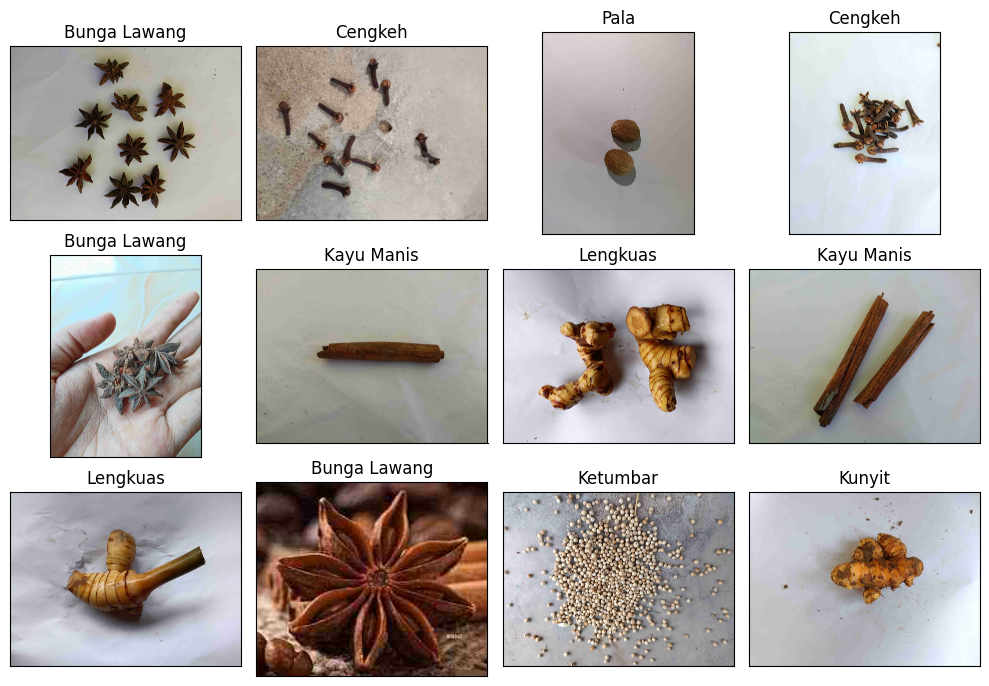

In [ ]:
# Menampilkan beberapa contoh dataset dari directory training
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(train_df.Filepath[i]))
    ax.set_title(train_df.Label[i])
plt.tight_layout()
plt.show()

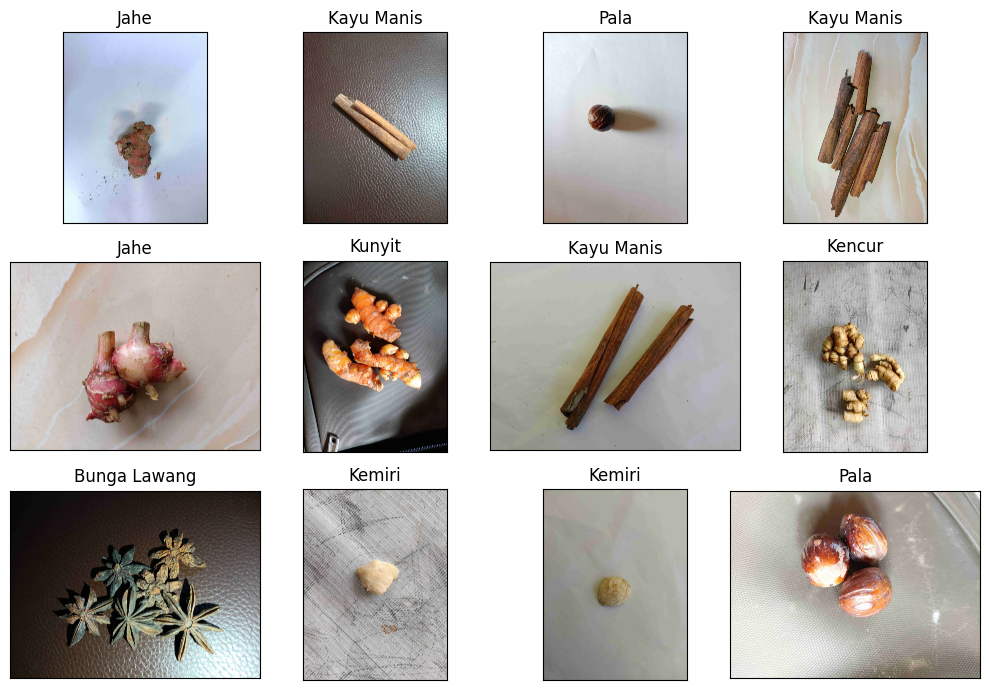

In [ ]:
# Menampilkan beberapa contoh dataset dari directory training
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(validasi_df.Filepath[i]))
    ax.set_title(validasi_df.Label[i])
plt.tight_layout()
plt.show()

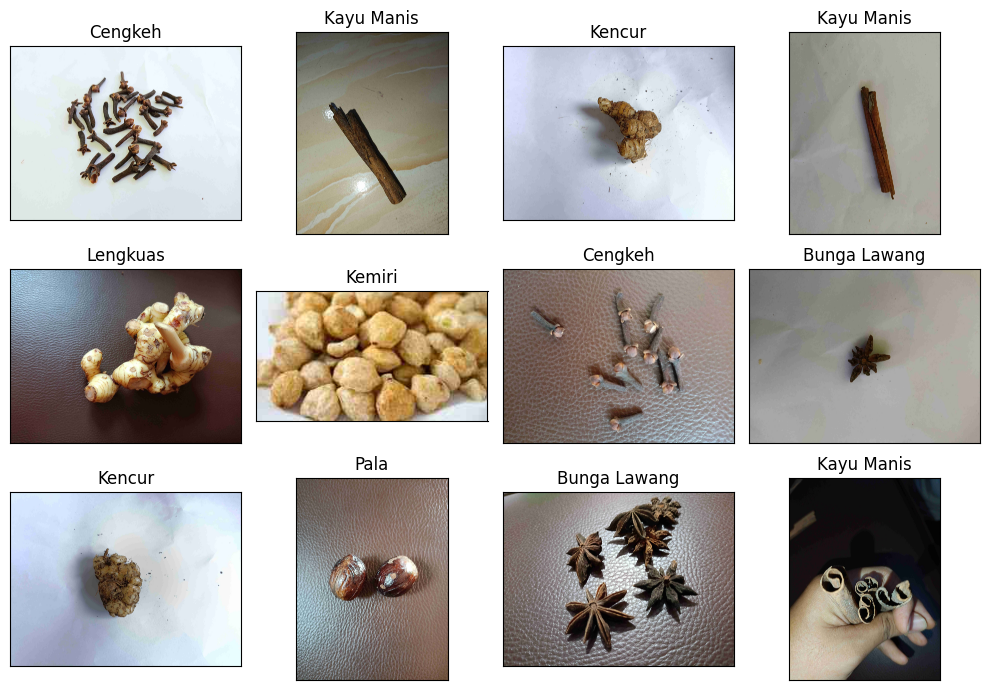

In [ ]:
# Menampilkan beberapa contoh dataset dari directory training
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath[i]))
    ax.set_title(test_df.Label[i])
plt.tight_layout()
plt.show()

<ipython-input-25-67f49b6db74c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.index, y = vc, palette = "rocket")


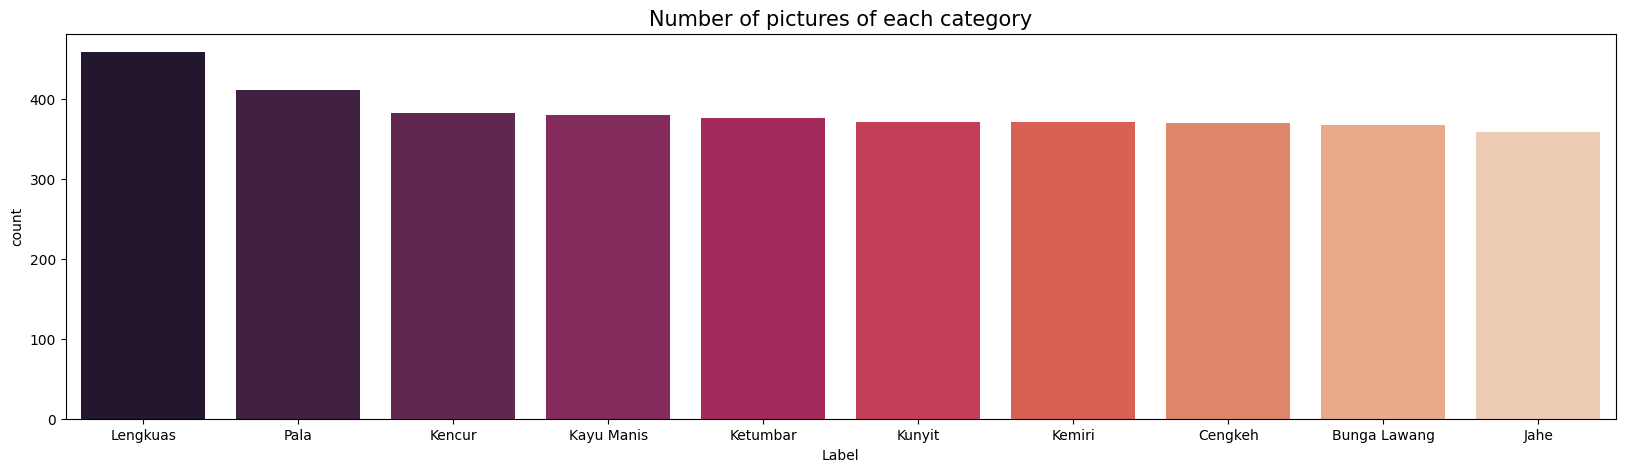

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = train_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

<ipython-input-26-2118e4bb8752>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.index, y = vc, palette = "rocket")


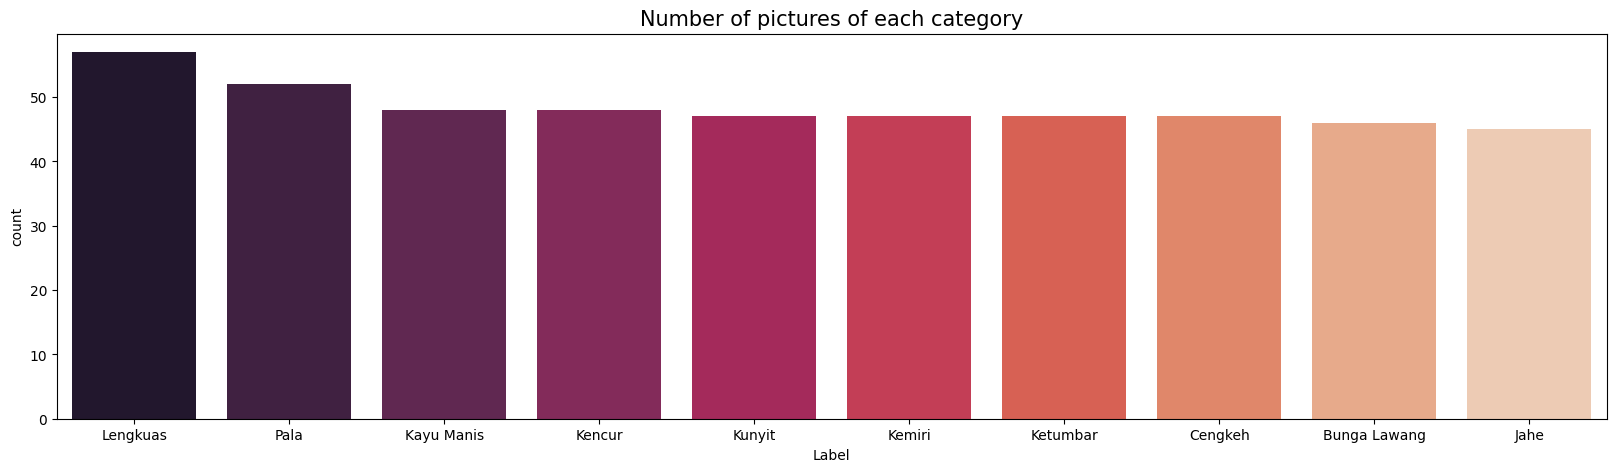

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = validasi_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

<ipython-input-27-321982c41b0e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.index, y = vc, palette = "rocket")


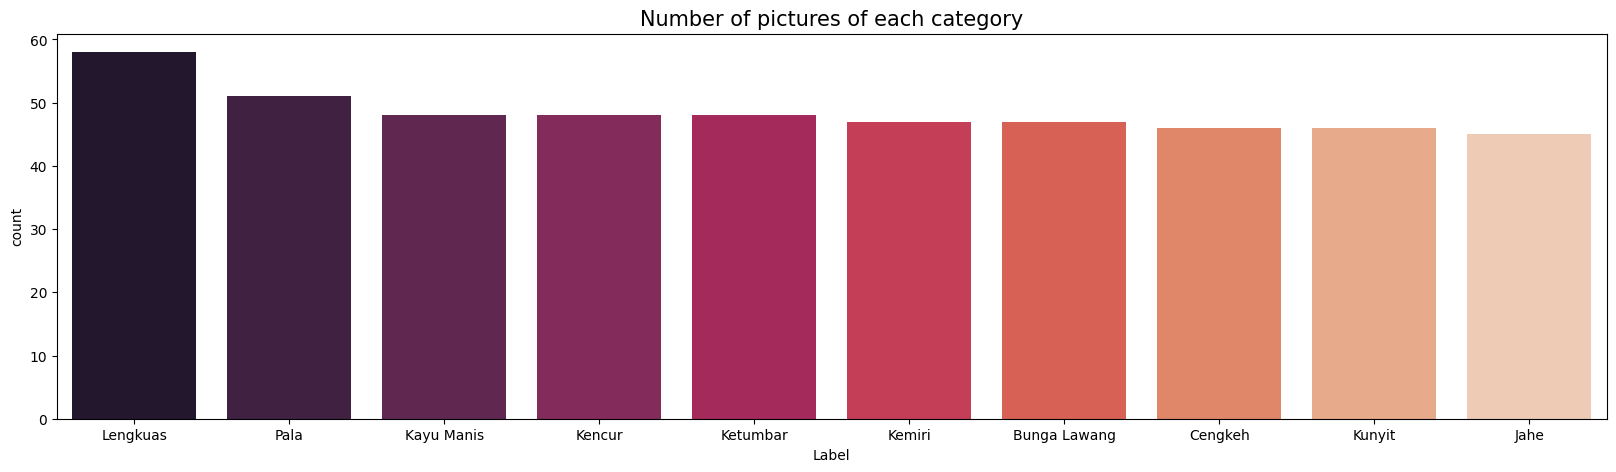

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = test_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         target_size=(224,224),
                                         batch_size=32,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                         )

validasi_data = val_datagen.flow_from_dataframe(dataframe=validasi_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         target_size=(224,224),
                                         batch_size=32,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )


uji_data = test_datagen.flow_from_dataframe(dataframe=test_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         target_size=(224,224),
                                         batch_size=32,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )

Found 3850 validated image filenames belonging to 10 classes.
Found 484 validated image filenames belonging to 10 classes.
Found 484 validated image filenames belonging to 10 classes.


In [ ]:
import tensorflow as tf
from keras import Model, Input
# Tentukan input shape yang sesuai untuk model VGG16
input_shape = (224, 224, 3)  # Sesuaikan dengan ukuran gambar yang Anda gunakan
model_input = tf.keras.Input(shape=input_shape)
batch_size=32

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Gunakan pre-trained VGG16 tanpa bagian fully connected (include_top=False)
base_model = VGG16(weights="imagenet", include_top=False, input_tensor=model_input)

# Bekukan semua layer base_model
base_model.trainable = False

# Buat model lengkap dengan menambahkan lapisan-lapisan berikut
VGG16_model = tf.keras.models.Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

#Kompilasi Model
optimizer = Adamax(learning_rate=0.0001)
VGG16_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
VGG16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 27565386 (105.15 MB)
Trainable params: 12850698 (49.02 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import os
import tensorflow as tf

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=1)

logs_dir = '/content/logs/'
if not os.path.exists(logs_dir):
    os.makedirs(logs_dir)

# Membuat objek TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs_dir, histogram_freq=1)

In [ ]:
# Jika menggunakan Python, Anda bisa mencoba hal berikut untuk membersihkan cache
import os
import sys

# Hapus file bytecode (.pyc) yang mungkin sudah tidak valid
pyc_files = [f for f in os.listdir() if f.endswith('.pyc')]
for pyc_file in pyc_files:
    os.remove(pyc_file)

# Hapus modul TensorFlow dari cache
module_name = 'tensorflow'  # Sesuaikan dengan nama modul TensorFlow Anda
if module_name in sys.modules:
    del sys.modules[module_name]

In [ ]:
import os
import pickle
from tensorflow.keras.callbacks import Callback

class HistorySaverCallback(Callback):
    def __init__(self, modelname, history_dir):
        super().__init__()
        self.modelname = modelname
        self.history_dir = history_dir

        # Membuat direktori history jika belum ada
        if not os.path.exists(history_dir):
            os.mkdir(history_dir)

    def on_epoch_end(self, epoch, logs=None):
        # Menyimpan history setiap epoch
        file_path = os.path.join(self.history_dir, f"{self.modelname}_224_AdaMax_vgg16V4.{epoch:02d}.pkl")
        with open(file_path, 'wb') as file_pi:
            pickle.dump(self.model.history.history, file_pi)

In [ ]:
history_dir = '/content/drive/MyDrive/Capstone/coba/VGG16/Adamax'
modelname = "224 AdaMax vgg16V4"

In [ ]:
save_history_callback = HistorySaverCallback(modelname, history_dir)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tentukan path penyimpanan model
checkpoint_path = '/content/drive/MyDrive/Capstone/coba/VGG16/Adamax/Adamax VGG16 V4.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=2)  # Menampilkan pesan saat menyimpan

In [ ]:
callbacks= [checkpoint_callback, tensorboard_callback, save_history_callback]
vgg16_history = VGG16_model.fit(
                  train_data,
                  validation_data=validasi_data,
                  steps_per_epoch=train_data.n/batch_size,
                  validation_steps=validasi_data.n/batch_size,
                  epochs=10,
                  callbacks=callbacks)

Epoch 1/10
121/120 [==============================] - ETA: -13s - loss: 0.9132 - accuracy: 0.7371
Epoch 1: loss improved from inf to 0.91324, saving model to /content/drive/MyDrive/Capstone/coba/VGG16/Adamax/Adamax VGG16 V4.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


120/120 [==============================] - 2749s 23s/step - loss: 0.9132 - accuracy: 0.7371 - val_loss: 0.4304 - val_accuracy: 0.9029
Epoch 2/10
121/120 [==============================] - ETA: -13s - loss: 0.3281 - accuracy: 0.9234
Epoch 2: loss improved from 0.91324 to 0.32814, saving model to /content/drive/MyDrive/Capstone/coba/VGG16/Adamax/Adamax VGG16 V4.h5
120/120 [==============================] - 2750s 23s/step - loss: 0.3281 - accuracy: 0.9234 - val_loss: 0.2732 - val_accuracy: 0.9380
Epoch 3/10
121/120 [==============================] - ETA: -13s - loss: 0.2168 - accuracy: 0.9564
Epoch 3: loss improved from 0.32814 to 0.21675, saving model to /content/drive/MyDrive/Capstone/coba/VGG16/Adamax/Adamax VGG16 V4.h5
120/120 [==============================] - 2689s 22s/step - loss: 0.2168 - accuracy: 0.9564 - val_loss: 0.2136 - val_accuracy: 0.9607
Epoch 4/10
121/120 [==============================] - ETA: -13s - loss: 0.1543 - accuracy: 0.9735
Epoch 4: loss improved from 0.21675 to

In [ ]:
import pickle
import matplotlib.pyplot as plt

# Path file pickle epoch pertama
path_to_epoch_pertama = "/content/drive/MyDrive/Capstone/coba/VGG16/Adamax/224 AdaMax vgg16V4_224_AdaMax_vgg16V4.00.pkl"

with open(path_to_epoch_pertama, 'rb') as file_pi:
    history_epoch_pertama = pickle.load(file_pi)

In [ ]:
# Plotting function
def display_training_curves(training1, validation1, training2, validation2, title, subplot):
    if subplot % 10 == 1:  # set up the subplots on the first call
        plt.subplots(figsize=(10, 10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(range(1, len(training1) + len(training2) + 1), training1 + training2, label='train')
    ax.plot(range(1, len(validation1) + len(validation2) + 1), validation1 + validation2, label='valid')
    ax.set_title('model ' + title)
    ax.set_ylabel(title)
    ax.set_ylim(0.0001, 1.05)
    ax.set_xlabel('epoch')
    ax.legend()

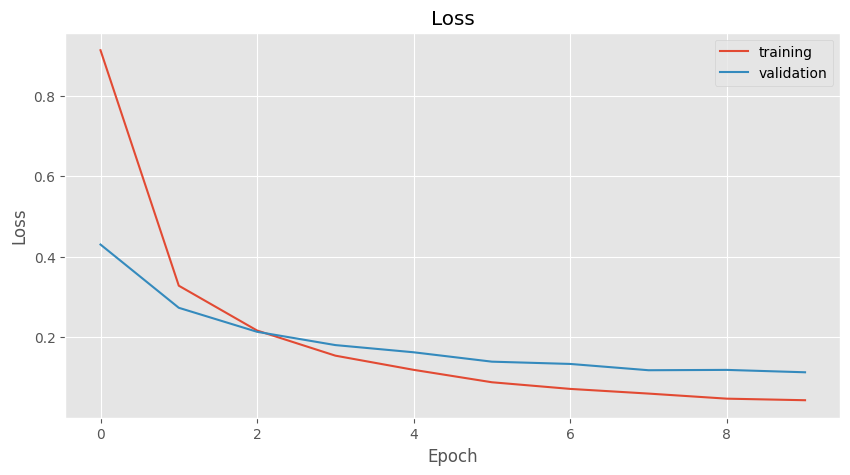

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 10), vgg16_history.history["loss"], label="training")
plt.plot(np.arange(0, 10), vgg16_history.history["val_loss"], label="validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
#Load Model Dari File .h5
import tensorflow as tf
adamax_vgg_model = tf.keras.models.load_model('/content/drive/MyDrive/Capstone/coba/VGG16/Adamax/Adamax VGG16 V4.h5')

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop
#compile model
optimizer = Adamax(learning_rate=0.0001)
adamax_vgg_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# Predict the label of the test_images
import numpy as np
pred_test = adamax_vgg_model.predict(uji_data)
pred_test = np.argmax(pred_test,axis=1)

# Map the label
labels = (uji_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred_test = [labels[k] for k in pred_test]

# Display the result
print(f'The first 5 predictions: {pred_test[:4]}')

16/16 [==============================] - 312s 19s/step
The first 5 predictions: ['Cengkeh', 'Kayu Manis', 'Kencur', 'Kayu Manis']


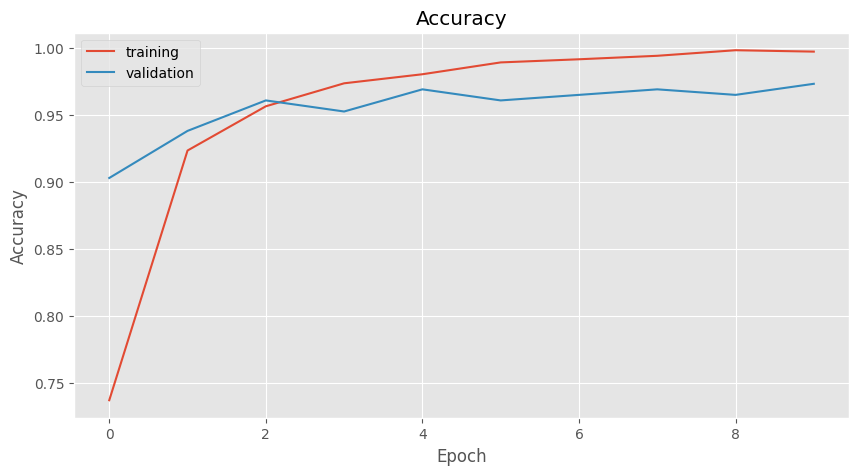

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 10), vgg16_history.history["accuracy"], label="training")
plt.plot(np.arange(0, 10), vgg16_history.history["val_accuracy"], label="validation")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(test_df.Label)
print(classification_report(y_test, pred_test, digits=5))

              precision    recall  f1-score   support

Bunga Lawang    1.00000   0.97872   0.98925        47
     Cengkeh    0.95833   1.00000   0.97872        46
        Jahe    0.91667   0.97778   0.94624        45
  Kayu Manis    0.96000   1.00000   0.97959        48
      Kemiri    0.97872   0.97872   0.97872        47
      Kencur    0.93878   0.95833   0.94845        48
    Ketumbar    1.00000   0.97917   0.98947        48
      Kunyit    0.95238   0.86957   0.90909        46
    Lengkuas    0.94737   0.93103   0.93913        58
        Pala    0.98000   0.96078   0.97030        51

    accuracy                        0.96281       484
   macro avg    0.96322   0.96341   0.96290       484
weighted avg    0.96325   0.96281   0.96262       484



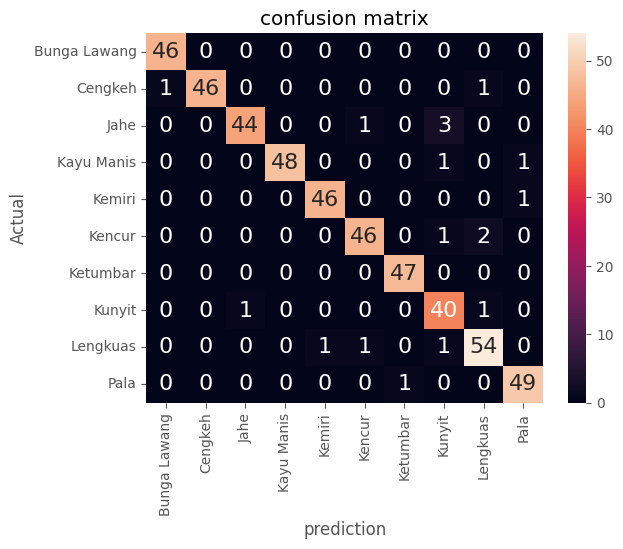

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
cm  = confusion_matrix(pred_test,y_test)

# Ambil nama kelas dari generator data
class_names = list(uji_data.class_indices.keys())
# Buat DataFrame untuk confusion matrix
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

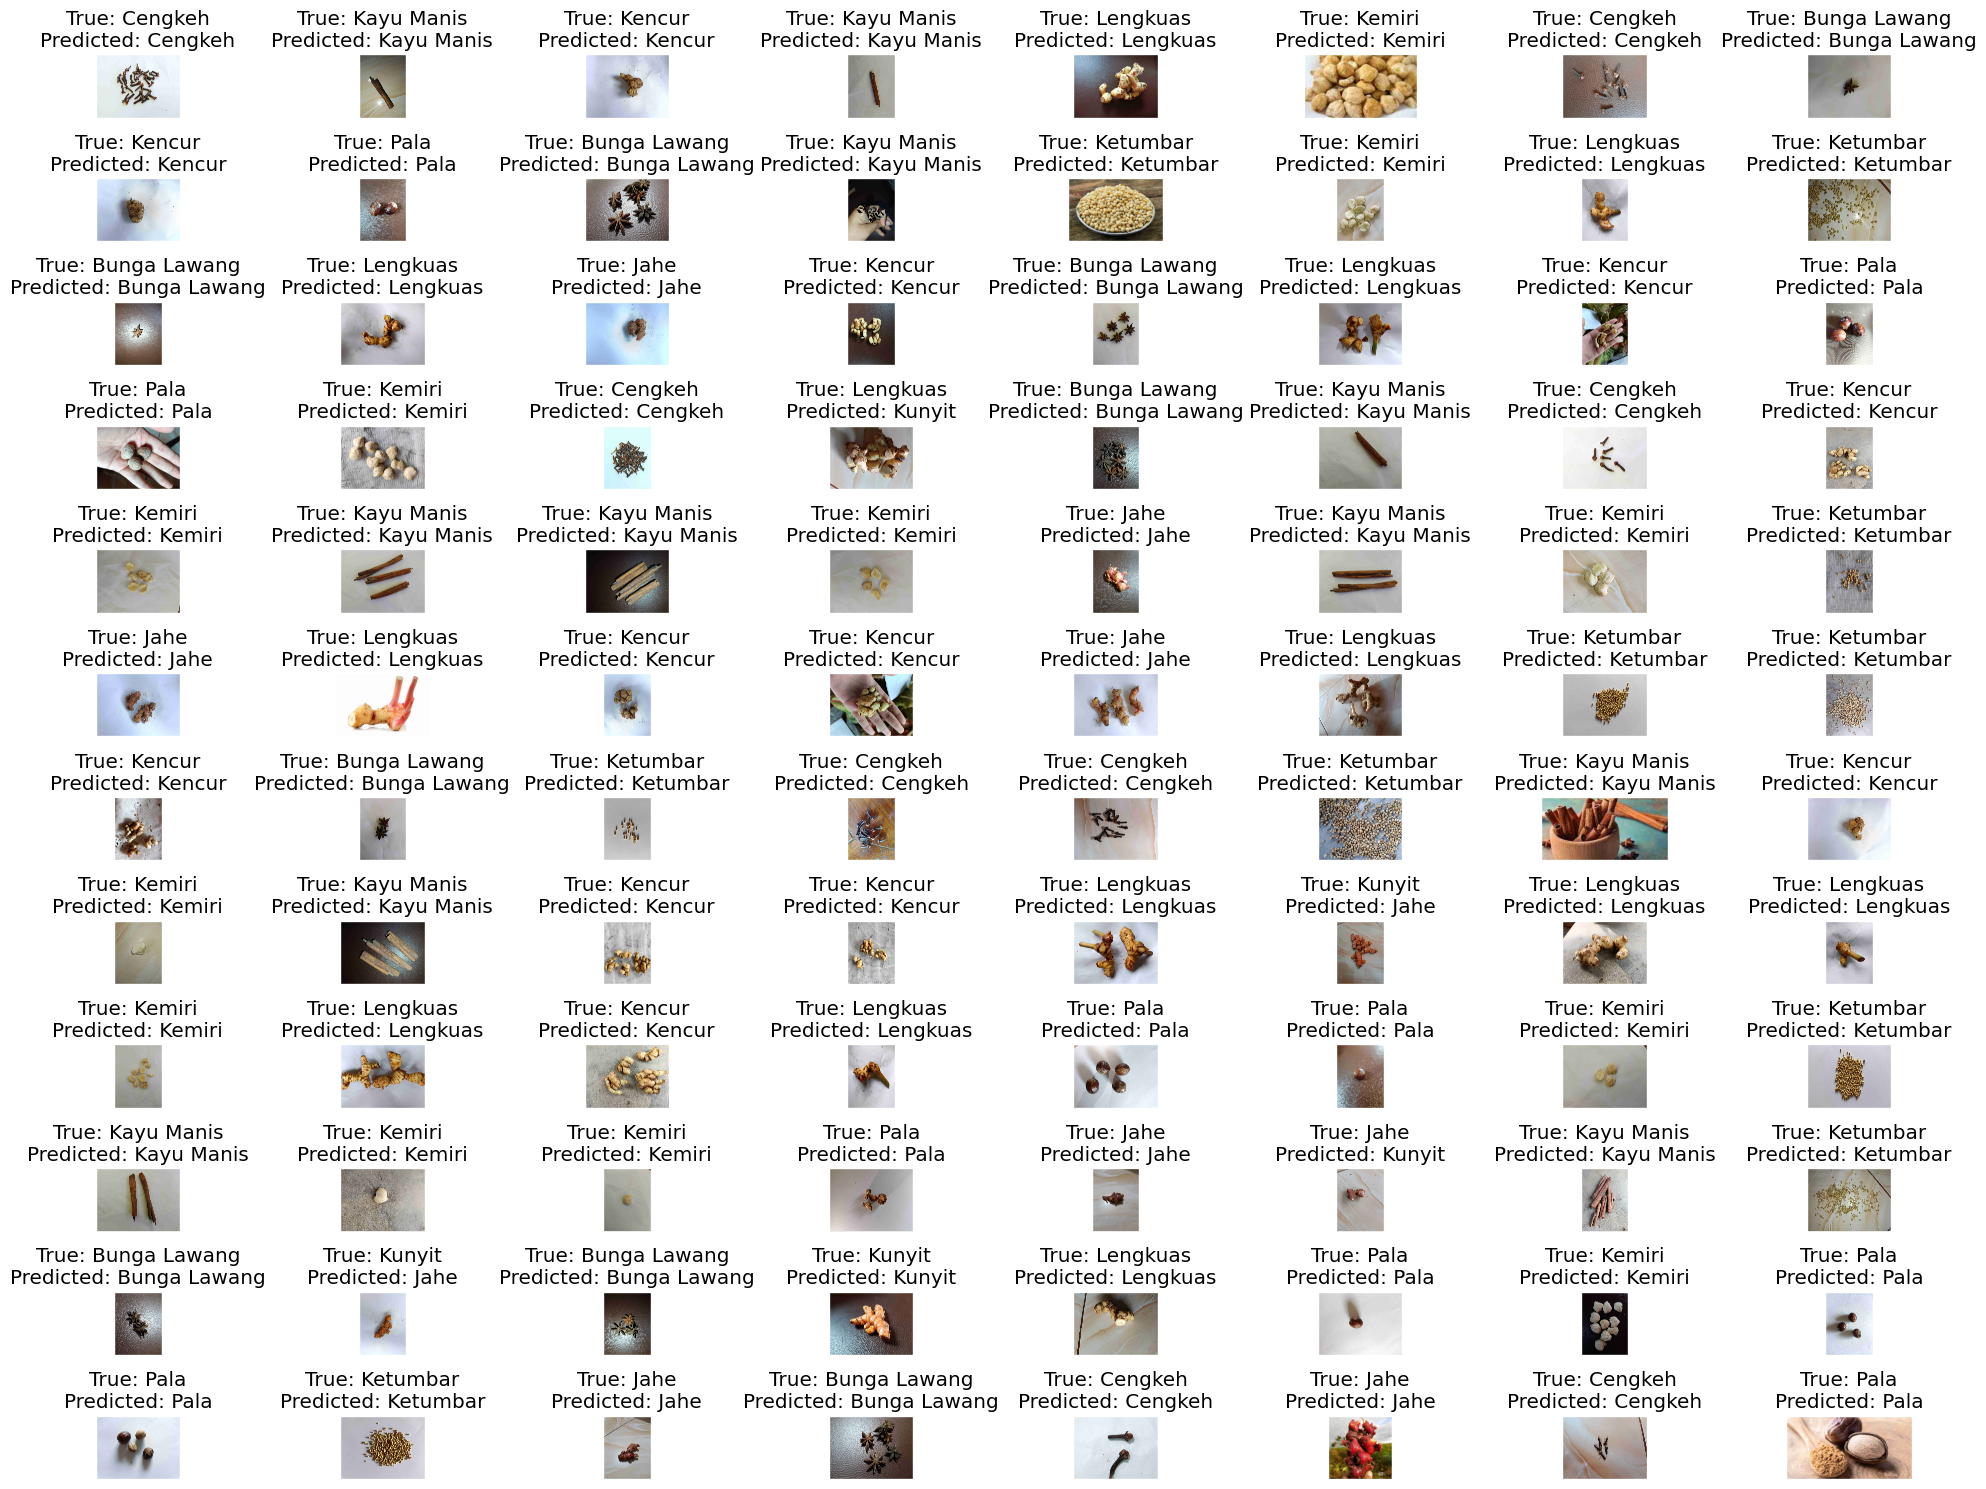

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=12, ncols=8, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred_test[i]}")
plt.tight_layout()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Capstone/coba/VGG16/Adamax/Adamax VGG16 V4.h5')
print("Model saved.")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved.


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import os
from google.colab import files

# Load trained model
model = tf.keras.models.load_model("/content/drive/MyDrive/Capstone/coba/VGG16/Adamax/Adamax VGG16 V4.h5")

# Path to directory containing class labels
train_dir = "/content/drive/MyDrive/Capstone/training"
class_list = sorted(os.listdir(train_dir))

# Function to process image and make prediction
def predict_image(img):
    # Preprocess image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize pixel values

    # Perform prediction
    predictions = model.predict(x)

    # Get predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_list[predicted_class_index]

    return predicted_class, predictions[0]

# Upload image
uploaded = files.upload()

# Process and predict class label for each uploaded image
for fn in uploaded.keys():
    # Load and preprocess uploaded image
    img = cv2.imread(fn)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img_thresh = cv2.threshold(img_gray, 240, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_sizes = [cv2.contourArea(contour) for contour in contours]
    main_contour = contours[np.argmax(contour_sizes)]
    x, y, w, h = cv2.boundingRect(main_contour)
    img_cropped = img[y:y+h, x:x+w]
    img_resized = cv2.resize(img_cropped, (224, 224))

    # Predict class label
    predicted_class, confidence_scores = predict_image(img_resized)

    # Display prediction result
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.title("Predicted Class: {}, Confidence Scores: {}".format(predicted_class, confidence_scores))
    plt.axis('off')
    plt.show()


NameError: name 'tf' is not defined